# This Is a model to classify different types of flowers.
## Most of the things has been explained in this notebbook

In [1]:
!nvidia-smi #to check how much GPU has been alloted and how much has bee used

Thu Jun  3 03:26:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Importing Libraries 

In [2]:
# importing libraries which might be required
import torch as T     #for palying with tensors
import torch.nn as nn       #for using nn.Module while creating own model
import torchvision
import torch.nn.functional as F   #torch module containg activtion functions
import torch.optim as optim       #torch module containing optimizers

import numpy as np
import matplotlib       #for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns     # for plotting bar graph
import os                 # for getting downloaded data dir
from tqdm.notebook import tqdm    # for showing progress bar while training

# Downloading Dataset


In [3]:
#install opendatasets and importing in colab
!pip install opendatasets
import opendatasets as od

In [4]:
# Downloading dataset from kaggle.com
dataset_url = "https://www.kaggle.com/nunenuh/pytorch-challange-flower-dataset"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sankalpsinghbais
Your Kaggle Key: ··········


  2%|▏         | 5.00M/330M [00:00<00:06, 50.8MB/s]

100%|██████████| 330M/330M [00:04<00:00, 74.5MB/s]


# Arranging and exploring data

In [5]:
#finding current working directory
print(os.getcwd(), os.listdir())

/content ['.config', 'pytorch-challange-flower-dataset', 'sample_data']


In [7]:
#exploring directory and dataset
data_dir = "/content/pytorch-challange-flower-dataset/dataset"
train_dir = data_dir + "/train"
test_dir = data_dir + "/valid"      #using validation data as test data
classes = os.listdir(train_dir)
print(len(classes), classes)

102 ['39', '14', '58', '79', '16', '92', '49', '82', '25', '7', '12', '60', '6', '3', '50', '18', '64', '83', '35', '100', '80', '97', '85', '40', '21', '15', '22', '44', '93', '62', '70', '38', '74', '63', '28', '91', '67', '5', '23', '42', '46', '102', '43', '71', '65', '75', '98', '17', '61', '51', '11', '29', '94', '66', '33', '89', '20', '1', '78', '31', '8', '84', '73', '77', '41', '86', '45', '68', '30', '47', '56', '55', '69', '10', '13', '87', '57', '24', '32', '96', '76', '36', '48', '27', '9', '54', '101', '90', '2', '99', '4', '59', '37', '95', '26', '53', '34', '19', '88', '81', '52', '72']


Total no. of classes = total types of flower in dataset = 102

Now the classes above are numeric we are provided with a .json file,
which maps the numbers above the the name of the category



In [8]:
#first lets have a look whats inside the json file
with open (data_dir + "/../cat_to_name.json", 'r') as fi:
    print(fi.read())

{"21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster", "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy", "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly", "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist", "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower", "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation", "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone", "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow", "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid", "54": "s

In [9]:
#The output is a dictionary. Lets copy this disctionry to a variable for ease.
import json
with open (data_dir + "/../cat_to_name.json", 'r') as fi:
    cat_to_name_dict = json.load(fi)
print(cat_to_name_dict)

{'21': 'fire lily', '3': 'canterbury bells', '45': 'bolero deep blue', '1': 'pink primrose', '34': 'mexican aster', '27': 'prince of wales feathers', '7': 'moon orchid', '16': 'globe-flower', '25': 'grape hyacinth', '26': 'corn poppy', '79': 'toad lily', '39': 'siam tulip', '24': 'red ginger', '67': 'spring crocus', '35': 'alpine sea holly', '32': 'garden phlox', '10': 'globe thistle', '6': 'tiger lily', '93': 'ball moss', '33': 'love in the mist', '9': 'monkshood', '102': 'blackberry lily', '14': 'spear thistle', '19': 'balloon flower', '100': 'blanket flower', '13': 'king protea', '49': 'oxeye daisy', '15': 'yellow iris', '61': 'cautleya spicata', '31': 'carnation', '64': 'silverbush', '68': 'bearded iris', '63': 'black-eyed susan', '69': 'windflower', '62': 'japanese anemone', '20': 'giant white arum lily', '38': 'great masterwort', '4': 'sweet pea', '86': 'tree mallow', '101': 'trumpet creeper', '42': 'daffodil', '22': 'pincushion flower', '2': 'hard-leaved pocket orchid', '54': 's

# Transforming dataset

In [10]:
from torchvision.datasets import ImageFolder   #used to create a dataset 
import torchvision.transforms as transf   #for transforming image before training


In [11]:
#Traning cant be done with real images. The images are needed to transformed into tensor for training on pytorch
#The data we're using has already been categorised into folder, so we can use ImageFolder method to convert img to tensors
# also lets make the size of all images equal if they are not
img_size = 230
imagenet_stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])   
transforms = transf.Compose([ 
                            transf.Resize(img_size),      #resizing all image to 224x224
                            transf.Pad(8, padding_mode='reflect'),  #adds space of a 4 units to both side of image 
                            transf.RandomCrop(img_size-6),  #randomly selects the part of image
                            transf.ToTensor(),            #converting image to tensor
                            transf.Normalize(*imagenet_stats) #normalizes the image
                            ])

dataset = ImageFolder(train_dir, transform = transforms)   #creating the dataset

In [12]:
#Exploring some more......
print("Classes : ",dataset.classes)#dataset classes created by ImageFolder command above
print(f"Total_Classes : {len(dataset.classes)}")
for i in range(10):  #to check dimentions of images
    print(f"Image {i+1} Shape : {dataset[i][0].shape}") 

print("\n\n",dataset) #gives information about the dataset
print(dataset[0][0].dtype)#prints the data type of first image

Classes :  ['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
Total_Classes : 102
Image 1 Shape : torch.Size([3, 224, 224])
Image 2 Shape : torch.Size([3, 224, 224])
Image 3 Shape : torch.Size([3, 224, 224])
Image 4 Shape : torch.Size([3, 224, 224])
Image 5 Shape : torch.Size([3, 224, 224])
Image 6 Shape : torch.Size([3, 224, 224])
Image 7 Shape : torch.Size([3, 224, 224])
Image 8 Shape : torch.Size([3, 224, 224])
Image 9 Shape : torch.Size

So as per above output our data set has 102 types of flowers and each images has three channels thats means the images are RGB , and we have reshaped all images to 224 x 224.

Now lets divide the dataset into two parts train dataset and val dataset.

In [13]:
from torch.utils.data import random_split
train_ds_size = 4914      #using 25 % images out of 6552 image to train 
val_ds_size = len(dataset) - train_ds_size #rest as validation 

train_ds ,val_ds = random_split(dataset,[train_ds_size, val_ds_size]) #randomly distributing images


In [14]:
#lets create a function to show the label and mapped value of label 
del(classes) #deleting variable classes
classes = dataset.classes   #reassigning the varible classes with a list
def mapped_label(labeled_index):
  """
  Pass the label obtained from unpacking  a image and label from a dataset
  img, label = train_ds[20]      <-- pass this single label
  """
  return cat_to_name_dict[str(classes[labeled_index])]

# Exploring Images
Awesome!! since now our image has been rescaled , transformed to tensor, so lets try to have a look over some of the images.


In [15]:
#in tensor form 
img, label = train_ds[4300]
print(label,mapped_label(label), img)
img.shape

39 daffodil tensor([[[-2.0665, -2.0665, -2.0665,  ..., -1.6213, -1.5528, -1.5185],
         [-2.0665, -2.0665, -2.0665,  ..., -1.5870, -1.5185, -1.5014],
         [-2.0665, -2.0665, -2.0665,  ..., -1.6042, -1.5014, -1.4672],
         ...,
         [-1.0904, -1.3473, -1.8097,  ..., -0.7308, -0.6794, -0.7137],
         [-1.0562, -1.1075, -1.6042,  ..., -0.7308, -0.6794, -0.7308],
         [-0.9534, -0.8164, -1.0390,  ..., -0.7479, -0.6794, -0.7308]],

        [[-1.9832, -1.9832, -1.9832,  ..., -1.6155, -1.5630, -1.5455],
         [-1.9832, -1.9832, -1.9832,  ..., -1.5980, -1.5630, -1.5805],
         [-1.9832, -1.9832, -1.9832,  ..., -1.6155, -1.5630, -1.5630],
         ...,
         [-0.8277, -1.1253, -1.6681,  ..., -1.1253, -1.1078, -1.1078],
         [-0.7577, -0.8452, -1.4230,  ..., -1.1078, -1.0903, -1.1253],
         [-0.6352, -0.5301, -0.8277,  ..., -1.1253, -1.0903, -1.1253]],

        [[-1.7870, -1.7870, -1.7870,  ..., -1.4907, -1.4559, -1.4559],
         [-1.7522, -1.7522, -1.75

torch.Size([3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label : 44: poinsettia


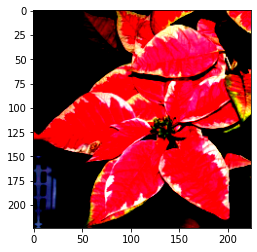

In [16]:
#Since our tensor is of the form (channel, height, width)
#we need to convert it to the form (height, width, channel)
#so that pyplot can display it
#defining a function to do it all
def show_img(ds, ind):     #takes dataset and image index number as input 
    """
    Pass the dataset and the index of the image.
    """
    img, label = ds[ind]      #here image is storing the image but label is storing the index number of the category from the classes.
    cls_ind = dataset.classes[label]
    print(f"Label : {cls_ind}: {mapped_label(label)}")
    plt.imshow(img.permute(1, 2, 0))

show_img(train_ds,2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label : 42: daffodil


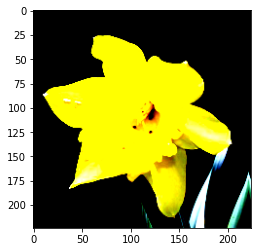

In [17]:
show_img(train_ds, 4300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label : 77: passion flower


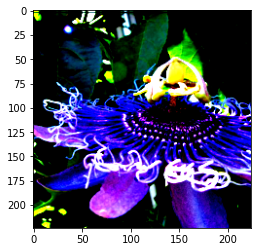

In [18]:
show_img(val_ds, 0)

Lets also have a look over number of images within each class

In [19]:
#the code takes a lil bit long time to run (aprrox 2 min 10 sec)if you wish to run it uncomment all the lines below.
#short cut to uncomment is select all lines below and then ctrl + /

# def img_per_cls(ds):         #select from this line
#     """
#     Warning!!!! Resource Hungry function....
#     Pass the dataset as argument.
#     """  
#     x = []
#     classes = ds.classes
#     for i in range(len(ds)):
#         x.append(ds[i][1])

#     uimg = T.tensor(x).unique(sorted=True)
#     uimg_count = T.stack([(T.tensor(x)==i).sum() for i in uimg])
#     for i in range(len(uimg)):
#         print(f"{classes[i]}, {mapped_label(i)}: {uimg_count[i].item()} count")

# img_per_cls(dataset)

# Creating Dataloaders

In [20]:
#defining data loader sizes
train_dl_size = len(train_ds)
val_dl_size = len(val_ds)
print(f"Train size : {train_dl_size}, Valid Size : {val_dl_size}")

Train size : 4914, Valid Size : 1638


In [21]:
#creating dataloader
from torch.utils.data.dataloader import DataLoader
train_dl = DataLoader(train_ds, batch_size = 63 , shuffle = True,
                      num_workers = 2, pin_memory =True )
val_dl = DataLoader(val_ds, batch_size = 126,num_workers = 2,
                    pin_memory =True )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


76 morning glory, 80 anthurium, 66 osteospermum, 71 gazania, 82 clematis, 55 pelargonium, 77 passion flower, 45 bolero deep blue, 46 wallflower, 62 japanese anemone, 89 watercress, 36 ruby-lipped cattleya, 90 canna lily, 12 colt's foot, 100 blanket flower, 14 spear thistle, 75 thorn apple, 81 frangipani, 61 cautleya spicata, 19 balloon flower, 83 hibiscus, 80 anthurium, 95 bougainvillea, 76 morning glory, 27 prince of wales feathers, 29 artichoke, 36 ruby-lipped cattleya, 99 bromelia, 75 thorn apple, 72 azalea, 23 fritillary, 56 bishop of llandaff, 33 love in the mist, 21 fire lily, 51 petunia, 4 sweet pea, 88 cyclamen, 26 corn poppy, 102 blackberry lily, 22 pincushion flower, 73 water lily, 23 fritillary, 50 common dandelion, 91 hippeastrum, 8 bird of paradise, 51 petunia, 30 sweet william, 53 primula, 79 toad lily, 36 ruby-lipped cattleya, 73 water lily, 67 spring crocus, 55 pelargonium, 11 snapdragon, 6 tiger lily, 79 toad lily, 8 bird of paradise, 61 cautleya spicata, 74 rose, 77 p

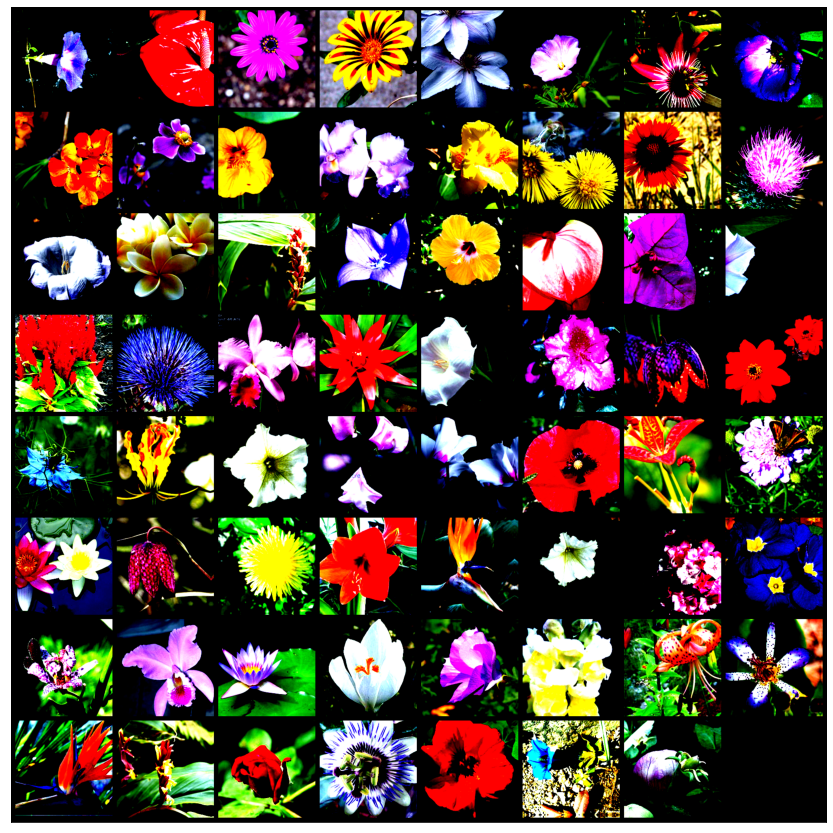

In [22]:
#visualising dataloader batches
from torchvision.utils import make_grid
def disp_batches(dl):
    for img, label in dl:
        for i in label:
            print(dl.dataset.dataset.classes[i],cat_to_name_dict[dl.dataset.dataset.classes[i]], end = ", ") 
        fig, ax = plt.subplots(figsize = (15, 15))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(img, padding = 10).permute(1, 2, 0 ))
        break 

disp_batches(train_dl)


# Creating/Defining Own  Model And Model Methods

Main thing begins here......

In [23]:
#Defining Base model or model functions which are required during training
class Model_Base(nn.Module):
    def training_step(self, batch):
        """
        Passes the training dataloader's batch through Network once and then calculates
        and  returns the loss
        """
        images, labels = batch 
        out = self(images)               # Outputs/Predictions returned by network
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        """
        Calculates and returns the loss and validation accuracy
        """
        tot_correct = 0
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        tot_correct = get_num_correct(out, labels)    #get total number of corect
        return {"val_loss": loss.detach(), "val_acc": acc, "tot_correct": tot_correct}

    def validation_epoch_end(self, outputs):
        """
        Calculate and return validation loss and accuracy after end of each epoch
        """
        tot_correct = 0
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = T.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = T.stack(batch_accs).mean()      # Combine accuracies
        tot_correct = sum([x['tot_correct'] for x in outputs])
        return {"val_loss": epoch_loss.item(), "val_acc": epoch_acc.item(), "tot_correct": tot_correct}

    def epoch_end(self, epoch, result):
        """
        Calculate and return Training loss after end of each epoch
        """
        print(f"Epoch {epoch+1}, Train loss : {result['train_loss']}, Val. Loss : {result['val_loss']}, val_acc : {result['val_acc']}, Total_Correct : {result['tot_correct']}\n")
        

In [24]:
#defining neural network model
class Flower_Classification_Model(Model_Base):
    """
    Pass colour channels and total number of classes as an argument.
    The Network consists of 6 Conv2d layers and  4 linear layers
    """
    def __init__(self, input_channels, output_classes):
        self.input_channels = input_channels    
        self.output_classes = output_classes

        super().__init__()                         #defining Network layers
        self.network= nn.Sequential(
            nn.Conv2d(self.input_channels,64,kernel_size = 7, stride =2 , padding=3, bias = False),   #conv layer 1  
            nn.BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(),        #activation function 
            
            nn.MaxPool2d(3,2),            #Exatracting features using max pool
            #image size is now 64x52x52
            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1, bias = False),    #conv layer 3
            nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, bias = False),    #conv layer 3
            nn.BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(),
            
            nn.MaxPool2d(2,2),
            #image size is now 128x25x25
            
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1, bias = False),    #conv layer 3
            nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias = False),    #conv layer 3
            nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(),
            
            nn.MaxPool2d(2,2),
            #image size is now 256x12x12
            
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1, bias = False),    #conv layer 3
            nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(),
            nn.Conv2d(512,512, kernel_size=3, stride=1, padding=1, bias = False),    #conv layer 3
            nn.BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(),
            
            nn.MaxPool2d(2,2),
            #image size is now 512x6x6
            
            nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1, bias = False),    #conv layer 3
            nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(),
            nn.Conv2d(1024, 1024, kernel_size=3, stride=1, padding=1, bias = False),    #conv layer 3
            nn.BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(),
            
            nn.MaxPool2d(2,2),
            #image size is now 1024x3x3
            
            nn.Conv2d(1024, 2048, kernel_size=3, stride=1, padding=1, bias = False),    #conv layer 3
            nn.BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(),
            nn.Conv2d(2048, 2048, kernel_size=3, stride=1, padding=1, bias = False),    #conv layer 3
            nn.BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(),
            
            nn.MaxPool2d(2,2),
            #image size is now 2048x1x1
            
            nn.AdaptiveAvgPool2d((1,1)),
            #added above layer in case if i have calulated image size wrong 
#             it will resize it to 2048x1x1 so that it can be paased to fully connectd layer
            
            nn.Flatten(),           #Flatting the image tensor to pass it to linear layer
            nn.Linear(in_features =2048*1*1, out_features = output_classes, bias = True)
            
        )

    def forward(self, t):             #this method is required while creating a model
        return self.network(t)


In [25]:
#defining function to calculate accuracy of the prediction/ output given by the model.
def accuracy(outputs, labels):
    """
    calulates the acuuracy of the model
    """
    _, preds = T.max(outputs, dim=1)
    print("->", end = '')
    return T.tensor(T.sum(preds == labels).item() / len(preds))

In [26]:
def get_num_correct(outputs, labels):
  """
  returns how many predictions were right
  """
  return (outputs.argmax(dim = 1).eq(labels).sum().item())

## Defining Function to train and validate model

In [27]:
# @T.no_grad() #turning off pytorch's gradient feature

def evaluate(model, dloader):   
    model.eval()
    outputs = [model.validation_step(batch) for batch in dloader]
    return model.validation_epoch_end(outputs)

def fit(model, train_dloader, val_dloader, epochs = 1, opt_func = optim.SGD, grad_clip = 0.1, lr = 0.1):
    """
    Takes in model , train dataloader, validation dataloader, epochs, learning rate
    and the trains the model for epoch times with provided learning rate
    """ 
    history = []    #list to store the result after each epoch
    optimizer = opt_func(model.parameters(), lr)
  
    for epoch in range(epochs):
        print(f"Epoch : {epoch+1} of {epochs}:\nTraining ")
        #Training Model
        model.train()   
        train_losses = []
        for batch in tqdm(train_dloader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()

            #GradClippig
            if grad_clip != 0:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

        #Validating after each epoch
        print("Validating ")
        result = evaluate(model, val_dloader)
        print("\n\t")
        result["train_loss"] = T.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
        if (epoch+1)%5 == 0 and epoch+1 >=10:
            if input("\nWant to continue for next 5 epochs?\n n for no else will continue----  ") == 'n':
                break
            else:
                continue
    return history


# GPU \ CPU Selection


In [28]:
def get_default_device():
  """Pick CUDA supported GPU if available, else CPU"""
  if T.cuda.is_available():
    T.cuda.empty_cache()    #clearing cache in GPU to get most out of it
    return T.device("cuda")
  else:
    return T.device("cpu")


def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [29]:
device = get_default_device() 
# device = T.device("cpu") 
device

device(type='cuda')

In [30]:
#moving dataloaders to selected device
train_dloader = DeviceDataLoader(train_dl, device)
val_dloader = DeviceDataLoader(val_dl, device)

# Training Model


In [31]:
#defining a function to check model parameters
def tot_model_params(model):
    print("Total Params = ",sum(p.numel() for p in model.parameters()))
    print("Total Trainable Params = ",sum(p.numel() for p in model.parameters() if p.requires_grad))

In [32]:
#Moving model to the device and creating instance of the model 
print(device)
input_channel = 3
output_classes = len(classes)
fcmodel =Flower_Classification_Model(input_channel,output_classes)
fcmodel =to_device(fcmodel, device)
print(fcmodel)
tot_model_params(fcmodel)

cuda
Flower_Classification_Model(
  (network): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): R

In [33]:
#install lr finder to find suitable lr for the custom model
!pip install torch_lr_finder

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.15E-04


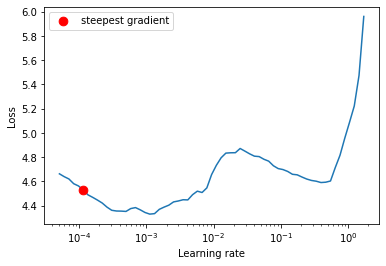

In [34]:
# finding suitable lr
from torch_lr_finder import LRFinder
model = fcmodel
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5, weight_decay=1e-9)
lr_finder = LRFinder(model, optimizer, criterion, device = device)
lr_finder.range_test(train_dl, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [35]:
T.cuda.empty_cache() #clearing cache from GPU

lets check the accuracy of model before training

In [36]:
%%time
evaluate(fcmodel, val_dloader)

->->->->->->->->->->->->->CPU times: user 1.23 s, sys: 352 ms, total: 1.58 s
Wall time: 12 s


{'tot_correct': 28,
 'val_acc': 0.017094017937779427,
 'val_loss': 4.624634742736816}

The first line above (%%time) is call a magic line
At the end of excution of the cell it returns elapsed time of the execution.

The accuracy now is .very low. Lets Train it

In [37]:
%%time
model = fcmodel
epochs = 20
train_dloader = train_dloader
val_dloader = val_dloader
opt_func = optim.Adam
lr = 9.77E-05
    #after some experiments i found the the above lr is best for this model
grad_clip = 0

history = fit(model, train_dloader, val_dloader,epochs,opt_func, grad_clip, lr)

Epoch : 1 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 1, Train loss : 3.485215902328491, Val. Loss : 3.026179790496826, val_acc : 0.2649572789669037, Total_Correct : 434

Epoch : 2 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 2, Train loss : 2.4131391048431396, Val. Loss : 2.6143054962158203, val_acc : 0.33577534556388855, Total_Correct : 550

Epoch : 3 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 3, Train loss : 1.8646175861358643, Val. Loss : 2.406477451324463, val_acc : 0.40415140986442566, Total_Correct : 662

Epoch : 4 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 4, Train loss : 1.4751530885696411, Val. Loss : 1.8432836532592773, val_acc : 0.5067155361175537, Total_Correct : 830

Epoch : 5 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 5, Train loss : 1.163020372390747, Val. Loss : 1.717384934425354, val_acc : 0.5512820482254028, Total_Correct : 903

Epoch : 6 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 6, Train loss : 0.9357119798660278, Val. Loss : 1.7816667556762695, val_acc : 0.5470085740089417, Total_Correct : 896

Epoch : 7 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 7, Train loss : 0.7364845871925354, Val. Loss : 1.636967658996582, val_acc : 0.5799756050109863, Total_Correct : 950

Epoch : 8 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 8, Train loss : 0.5596597790718079, Val. Loss : 1.4704992771148682, val_acc : 0.6025640964508057, Total_Correct : 987

Epoch : 9 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 9, Train loss : 0.465954065322876, Val. Loss : 1.5313471555709839, val_acc : 0.6062270998954773, Total_Correct : 993

Epoch : 10 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 10, Train loss : 0.38074660301208496, Val. Loss : 1.2920465469360352, val_acc : 0.6575091481208801, Total_Correct : 1077

Epoch : 11 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 11, Train loss : 0.26680850982666016, Val. Loss : 1.2423410415649414, val_acc : 0.668498158454895, Total_Correct : 1095

Epoch : 12 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 12, Train loss : 0.2124713957309723, Val. Loss : 1.1292595863342285, val_acc : 0.6959707736968994, Total_Correct : 1140

Epoch : 13 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 13, Train loss : 0.16676345467567444, Val. Loss : 1.038351058959961, val_acc : 0.7240537405014038, Total_Correct : 1186

Epoch : 14 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 14, Train loss : 0.14202718436717987, Val. Loss : 1.3104037046432495, val_acc : 0.672771692276001, Total_Correct : 1102

Epoch : 15 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 15, Train loss : 0.14720146358013153, Val. Loss : 1.0737298727035522, val_acc : 0.7332112193107605, Total_Correct : 1201

Epoch : 16 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 16, Train loss : 0.11957354843616486, Val. Loss : 1.2422184944152832, val_acc : 0.6855922341346741, Total_Correct : 1123

Epoch : 17 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 17, Train loss : 0.08732251077890396, Val. Loss : 0.973230242729187, val_acc : 0.7564102411270142, Total_Correct : 1239

Epoch : 18 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 18, Train loss : 0.10037966072559357, Val. Loss : 1.0804678201675415, val_acc : 0.7289377450942993, Total_Correct : 1194

Epoch : 19 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 19, Train loss : 0.1068149209022522, Val. Loss : 1.234786033630371, val_acc : 0.7100121974945068, Total_Correct : 1163

Epoch : 20 of 20:
Training 



Validating 
->->->->->->->->->->->->->
	
Epoch 20, Train loss : 0.12243688851594925, Val. Loss : 1.1102182865142822, val_acc : 0.7264957427978516, Total_Correct : 1190


Want to continue for next 5 epochs?  
CPU times: user 1min 7s, sys: 24 s, total: 1min 31s
Wall time: 23min 36s


The accuracy of our custom model is 76.12% after 20 epochs with some distrotion.
execution time was 18 minutes

lets see accuracy and losses graphically

## Plotting Accuracies and Losses

In [38]:
def plot_accuracies(history):
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title('Accuracy vs. No. of epochs');
    accuracies = [x["val_acc"] for x in history]
    plt.plot(accuracies, '-x')

def plot_losses(history):
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss vs. No. of epochs")
    train_losses = [x.get("train_loss") for x in history]
    val_losses = [x["val_loss"] for x in history]
    plt.plot(train_losses, "-bx")
    plt.plot(val_losses, "-rx")
    plt.legend(["Training", "Validation"])



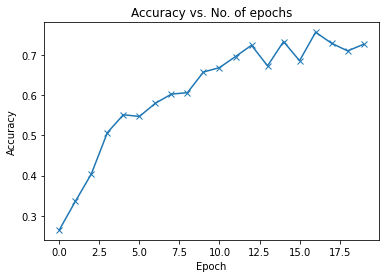

In [39]:
plot_accuracies(history)

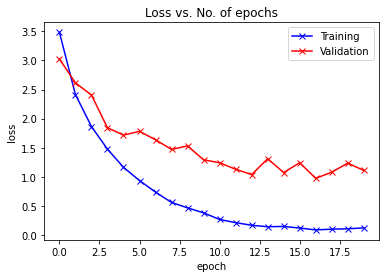

In [40]:
plot_losses(history)

In [ ]:
# T.save(fcmodel.state_dict(), "flwrclassification-40epo.pth")

#Testing model accuracy on test dataset

In [41]:
#validating model using test_dl
test_ds = ImageFolder(test_dir, transform = transforms) 
test_dl = DataLoader(test_ds, batch_size = 102)
test_dloader = DeviceDataLoader(test_dl,device)

In [42]:
len(test_ds)

818

In [43]:
evaluate(fcmodel, test_dloader)

->->->->->->->->->

{'tot_correct': 621,
 'val_acc': 0.7854030132293701,
 'val_loss': 0.8965206146240234}

The accuracy of custom model is 75 percent on test dataset



In [44]:
!pip install google.colab

     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 71kB 10.4MB/s 
     |████████████████████████████████| 112kB 46.0MB/s 
     |████████████████████████████████| 8.0MB 25.4MB/s 
     |████████████████████████████████| 10.1MB 46.8MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 491kB 47.9MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
  Created wheel for google.colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102290 sha256=1781a3d9403ba879c7986fb3aea9070867a8974fd115e5df2700507f93582a1e
  Stored in directory: /root/.cache/pip/wheels/38/0d/59/701e300a337b2a2e07b27fe74dbfff0bc56ac58f711566ee67
  Created wheel for portpicker: filename=portpicker-1.2.0-cp37-none-any.whl size=13383 sha256=b7b84e49aff05d9fb910b4295d1fe0519f8127dea18c8023bf54a854a4c192de
  Stored in directory: /root/.cache/pip/wheels/4a/45/47/1e126be9d4605e71f00d6e6fb151611f2f4cb9770b050c7d2d
  Created wheel

In [45]:
def upload_image():
    """
    uploades image from the local system and return the image as PIL
    """
    from google.colab import files
    import matplotlib.image as mpimg
    from PIL import Image
    uploaded = files.upload()
    uploaded.keys()
    for x in uploaded.keys():
        path = "/content/"+x
        break
    print(path)
    img = Image.open(path)
    return img

In [46]:
img = upload_image()

Saving rose.jpg to rose.jpg
/content/rose.jpg


In [48]:
def predict_image(img, model, top_num = 5):
    img = transforms(img)
    xb = to_device(img.unsqueeze(0), device)  #converting into a single batch
    yb = model(xb)            # Get predictions from model
    preds  = (yb)    # Pick index with highest probability
    top_preds, top_labels = preds.topk(top_num)   #get top 5 predictions
    top_preds = top_preds.detach().tolist()[0]     #convert them to list
    top_labels = top_labels.detach().tolist()[0]
    top_flowers = [mapped_label(label) for label in top_labels]    
    return top_preds,top_labels,top_flowers

In [49]:
print(predict_image(img, fcmodel))

([7.584589958190918, 6.108983039855957, 5.372786521911621, 4.9290056228637695, 4.738668918609619], [74, 21, 97, 87, 73], ['rose', 'corn poppy', 'bougainvillea', 'tree mallow', 'water lily'])


In [52]:
def plot_pred(img, model, top_num = 5):
    #Get Predictions
    preds, labs, flowers = predict_image(img, model, top_num) 
    #Set up plot
    plt.figure(figsize = (6,10))
    plt.subplot(2,1,1)
    plt.title(flowers[0])
    # Make prediction
    plt.imshow(img)
    # # Plot bar chart
    plt.subplot(2,1,2)
    plt.title("Top Predictions")
    sns.barplot(x=preds, y=flowers, color=sns.color_palette()[0]);
    plt.show()
    print(f"The flower is Probably {dataset.classes[labs[0]],flowers[0]}")

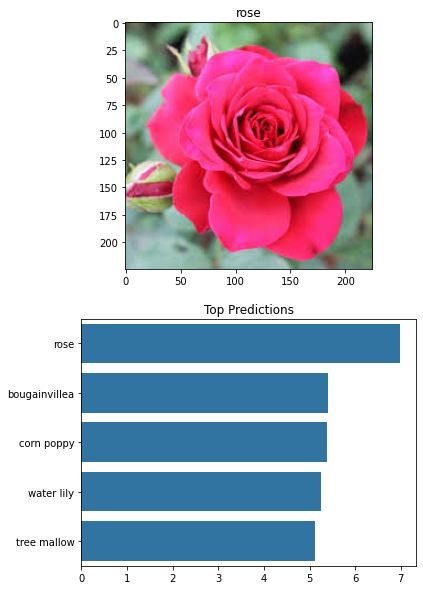

The flower is Probably ('74', 'rose')


In [53]:
plot_pred(img, fcmodel)

okay so my model is pretty good now


#Using a pre-trained model for classification 

In [54]:
from torchvision import models

In [55]:
#defing class for pretrained model
class PreTrainedClassificationModel(Model_Base):
    def __init__(self, output_classes, pretrained = True):
        super().__init__()
        self.network = models.resnet34(pretrained = pretrained)
        self.network.fc = nn.Linear(self.network.fc.in_features, output_classes)   #replacing last layer of the pretrained model

    def forward(self, xb):
        return self.network(xb)


In [56]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group["lr"]


In [57]:
def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader,
                  weight_decay=0, grad_clip=None, opt_func=optim.SGD):
    if T.cuda.is_available():
        T.cuda.empty_cache()
    
    history = []
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)# Set up custom optimizer with weight decay
    
    sched = T.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs,
                                                steps_per_epoch=len(train_loader))    # Set up one-cycle learning rate scheduler
    
    for epoch in range(epochs):
        print(f"Epoch : {epoch+1} of {epochs}:\nTraining")
        # Training Phase
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)

            optimizer.step()
            optimizer.zero_grad()

            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        # Validation phase
        print("\nValidating ")
        result = evaluate(model, val_loader)
        print("\n\t")
        result['train_loss'] = T.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

## Tuning Pretrained Model

In [58]:
output_classes = len(dataset.classes)
print(output_classes)
fcmodel2 = PreTrainedClassificationModel(output_classes,pretrained = True)
print(device)
fcmodel2 = to_device(fcmodel2, device)
print(fcmodel2)   #to see models architecture
tot_model_params(fcmodel2)

102


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth



cuda
PreTrainedClassificationModel(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum

In [59]:
tot_model_params(fcmodel2)

Total Params =  21336998
Total Trainable Params =  21336998


Let's check the accuracy before tuning


In [60]:
%%time
history2 = [evaluate(fcmodel2, val_dloader)]
print(history2)

->->->->->->->->->->->->->[{'val_loss': 4.868005752563477, 'val_acc': 0.007936508394777775, 'tot_correct': 13}]
CPU times: user 1.9 s, sys: 283 ms, total: 2.18 s
Wall time: 12.3 s


Training the resnet34 model to identify data as per our needs

In [61]:
epochs = 10
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = optim.Adam

In [62]:
%%time
history2 += fit_one_cycle(epochs, max_lr, fcmodel2, train_dloader, val_dloader,
                          grad_clip=grad_clip, weight_decay=weight_decay,
                          opt_func = opt_func)

Epoch : 1 of 10:
Training




Validating 
->->->->->->->->->->->->->
	
Epoch 1, Train loss : 1.8122979402542114, Val. Loss : 14.015621185302734, val_acc : 0.08485960215330124, Total_Correct : 139

Epoch : 2 of 10:
Training




Validating 
->->->->->->->->->->->->->
	
Epoch 2, Train loss : 2.36383056640625, Val. Loss : 13.531293869018555, val_acc : 0.052503056824207306, Total_Correct : 86

Epoch : 3 of 10:
Training




Validating 
->->->->->->->->->->->->->
	
Epoch 3, Train loss : 2.005557060241699, Val. Loss : 2.766828775405884, val_acc : 0.3699633777141571, Total_Correct : 606

Epoch : 4 of 10:
Training




Validating 
->->->->->->->->->->->->->
	
Epoch 4, Train loss : 1.2992334365844727, Val. Loss : 2.7309975624084473, val_acc : 0.4377289414405823, Total_Correct : 717

Epoch : 5 of 10:
Training




Validating 
->->->->->->->->->->->->->
	
Epoch 5, Train loss : 0.9334537982940674, Val. Loss : 1.405538558959961, val_acc : 0.6141636371612549, Total_Correct : 1006

Epoch : 6 of 10:
Training




Validating 
->->->->->->->->->->->->->
	
Epoch 6, Train loss : 0.6340723037719727, Val. Loss : 0.9524850249290466, val_acc : 0.7307692170143127, Total_Correct : 1197

Epoch : 7 of 10:
Training




Validating 
->->->->->->->->->->->->->
	
Epoch 7, Train loss : 0.383248895406723, Val. Loss : 0.6942912936210632, val_acc : 0.8131867051124573, Total_Correct : 1332

Epoch : 8 of 10:
Training




Validating 
->->->->->->->->->->->->->
	
Epoch 8, Train loss : 0.18662260472774506, Val. Loss : 0.44532233476638794, val_acc : 0.8717948198318481, Total_Correct : 1428

Epoch : 9 of 10:
Training




Validating 
->->->->->->->->->->->->->
	
Epoch 9, Train loss : 0.07714546471834183, Val. Loss : 0.33424246311187744, val_acc : 0.9047619700431824, Total_Correct : 1482

Epoch : 10 of 10:
Training




Validating 
->->->->->->->->->->->->->
	
Epoch 10, Train loss : 0.041266024112701416, Val. Loss : 0.33312422037124634, val_acc : 0.9072040319442749, Total_Correct : 1486

CPU times: user 1min 48s, sys: 1min 10s, total: 2min 58s
Wall time: 9min


The accuracy of the pretrained model is around 91% in just 10 epocs

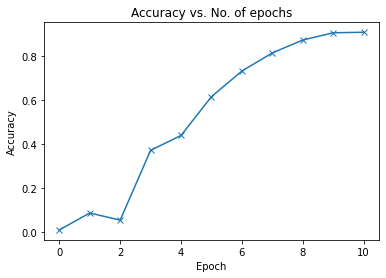

In [63]:
plot_accuracies(history2)

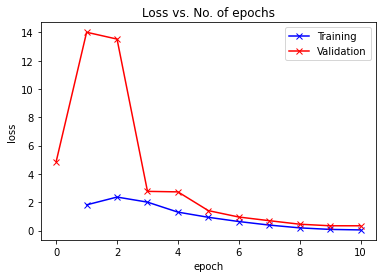

In [64]:
plot_losses(history2)

Final evaluation

In [65]:
evaluate(fcmodel2,test_dloader)

->->->->->->->->->

{'tot_correct': 748,
 'val_acc': 0.9237473011016846,
 'val_loss': 0.29722267389297485}

In [67]:
img = upload_image()

Saving rose.jpg to rose (1).jpg
/content/rose.jpg


In [68]:
predict_image(img, fcmodel2)

([13.153864860534668,
  4.275326728820801,
  3.4339001178741455,
  3.207767963409424,
  2.8863677978515625],
 [74, 98, 97, 27, 78],
 ['rose', 'camellia', 'bougainvillea', 'carnation', 'lotus lotus'])

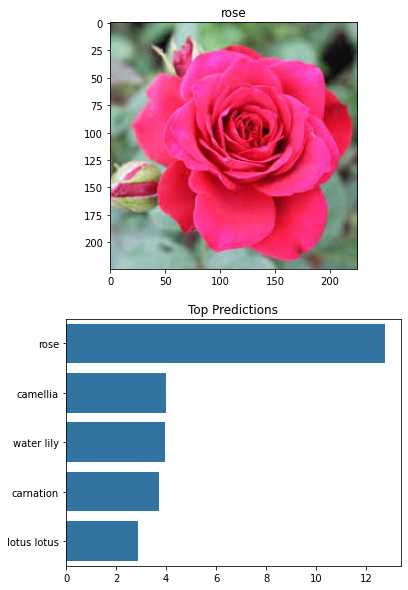

The flower is Probably ('74', 'rose')


In [69]:
plot_pred(img, fcmodel2)